# ULS Risley Prism Scanner Demo

Notebook: Hannah Weiser & Sina Zumstein, 2023

This demo scene showcases various toyblock models scanned by a risley prism scanner mounted on a UAV. We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

## Survey
Let us look at the XML files in the simulation. First, we investigate the survey XML file, `uls_toyblocks_livox.xml`:

In [2]:
os.chdir(helios_path)
Code(display_xml(r'data\surveys\toyblocks\uls_toyblocks_livox.xml'), language='XML')

<document>
	<scannerSettings id="template1" active="true" pulseFreq_hz="100000" scanAngle_deg="23" /> 
	<survey name="toyblocks_uls_livox" platform="data/platforms.xml#copter_linearpath" scanner="data/scanners_als.xml#livox_mid-70" scene="data/scenes/toyblocks/toyblocks_scene.xml#toyblocks_scene">
	<!-- platform: quadcopter, deflector: rotating -->
		<leg>
			<platformSettings x="-80.0" y="-50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="80.0" y="-50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="-80.0" y="50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="80.0" y="50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
	</survey>
</document>

Here we see 4 `leg` elements (resulting in three flight strips) which define the waypoints of the trajectory of the platform (`copter_linearpath` UAV) and the speed between these waypoints (`movePerSec_m`). The scanner settings a defined using a common template (`template1`), which is provided at the very beginning of the document.


## Scanner

Now let's have a look how a scanner with a risley prism is defined. Here, the [`livox_mid-70`](https://www.livoxtech.com/de/mid-70), defined in `data/scanners_tls.xml` is used:

In [3]:
Code(display_xml('data/scanners_als.xml', 'livox_mid-70'), language='XML')

<scanner id="livox_mid-70" accuracy_m="0.02" beamDivergence_rad="0.004887" name="Livox Mid-70" optics="risley" pulseFreqs_Hz="100000" pulseLength_ns="4" rangeMin_m="2" scanAngleMax_deg="35" scanAngleEffectiveMax_deg="35" rotorFreq1_Hz="7294" rotorFreq2_Hz="-4664" wavelength_nm="905" maxNOR="1">
		<FWFSettings beamSampleQuality="3" />
		<beamOrigin x="0" y="0" z="0">
			<rot axis="x" angle_deg="90" />			
			<rot axis="z" angle_deg="90" />
		</beamOrigin>

		<headRotateAxis x="1" y="0" z="0" />
	</scanner>

For this deflector type, the scan pattern is controlled by the rotation speeds (`rotorFreq1_Hz` and `rotorFreq2_Hz`) of two rotating risley prisms. This design on which the low-cost Livox scanners are based is described in detail in [Liu et al. (2022)](https://doi.org/10.1109/TMECH.2021.3058173).

More information on the Livox sensors and their point cloud characteristics can be obtained from the [Livox Wiki](https://livox-wiki-en.readthedocs.io/en/latest/introduction/Point_Cloud_Characteristics_and_Coordinate_System%20.html).

For further reading on rotational risley prisms, see [Duma & Schitea (2018)](https://acad.ro/sectii2002/proceedings/doc2018-1/08.pdf).

The `beamOrigin` is configured so that the scanner is rotated by 90° around the x-axis, i.e., pointing upwards, and 90° around the z-axis, i.e., scanning left-to-right.

## Platform

In [4]:
Code(display_xml(r'data/platforms.xml', 'copter_linearpath'))

<platform id="copter_linearpath" name="Quadrocopter UAV" type="linearpath">
		<scannerMount x="0" y="0" z="0.2">
			<rot axis="x" angle_deg="175" />
		</scannerMount>
		<!--<positionXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<attitudeXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>-->
	</platform>

This is a `linearpath` type platform, a mobile platform which moves in a straight line between consecutive legs with a constant speed provided by the user.

We saw earlier, that the scanner is pointing upwards and scanning left-to-right. Using the `scannerMount`, the platform is now rotated around the x axis by 175°, resulting in a tilt back by 5° off-nadir. This way, we simulate the pitch of a multirotor drone when heading forwards.

# Scene
Now we will have a look at the scene, `toyblocks_scene.xml` in `data/scenes/toyblocks/toyblocks_scene.xml`:

In [5]:
Code(display_xml(r'data/scenes/toyblocks/toyblocks_scene.xml', 'toyblocks_scene'))

<scene id="toyblocks_scene" name="ToyblocksScene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="70" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="20.0;0;0" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="rotate">
				<param key="rotation" type="rotation">
					<rot angle_deg="45" axis="z" />
				</param>
			</filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
			<filter type="translate">
				<param type="integer" key="onGround" value="-1" />
				<param type="vec3" key="offset" value="-45.0;10.0;10" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/sphere.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
        </part>
         <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cylinder.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
    </scene>

 Here we see different objects, which compose the scene: the `groundplane.obj`, `cube.obj` twice, `sphere.obj` and the `cylinder.obj`. To load them, the `objloader` filter is being used. Different [coordinate transformation](https://github.com/3dgeo-heidelberg/helios/wiki/Scene#coordinate-transformations) filters are applied to the different scene parts: The groundplane is translated. The second `cube.obj` is rotated, scaled and translated. The `sphere.obj` is scaled.

## Executing the Simulation

Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [6]:
!"run/helios.exe" data/surveys/toyblocks/uls_toyblocks_livox.xml -q
output_path = find_playback_dir("data/surveys/toyblocks/uls_toyblocks_livox.xml")

## The results 
Now we can display the resulting point cloud and trajectory.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

print("Loading points from", Path(output_path).relative_to(helios_path).as_posix())

strip_1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'leg001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'leg002_points.xyz')

traj_1 = np.loadtxt(Path(output_path) / 'leg000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'leg001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'leg002_trajectory.txt')

traj = np.vstack((traj_1[:, :3], traj_2[:, :3], traj_3[:, :3]))

Loading points from output/toyblocks_uls_livox/2023-02-08_09-55-07


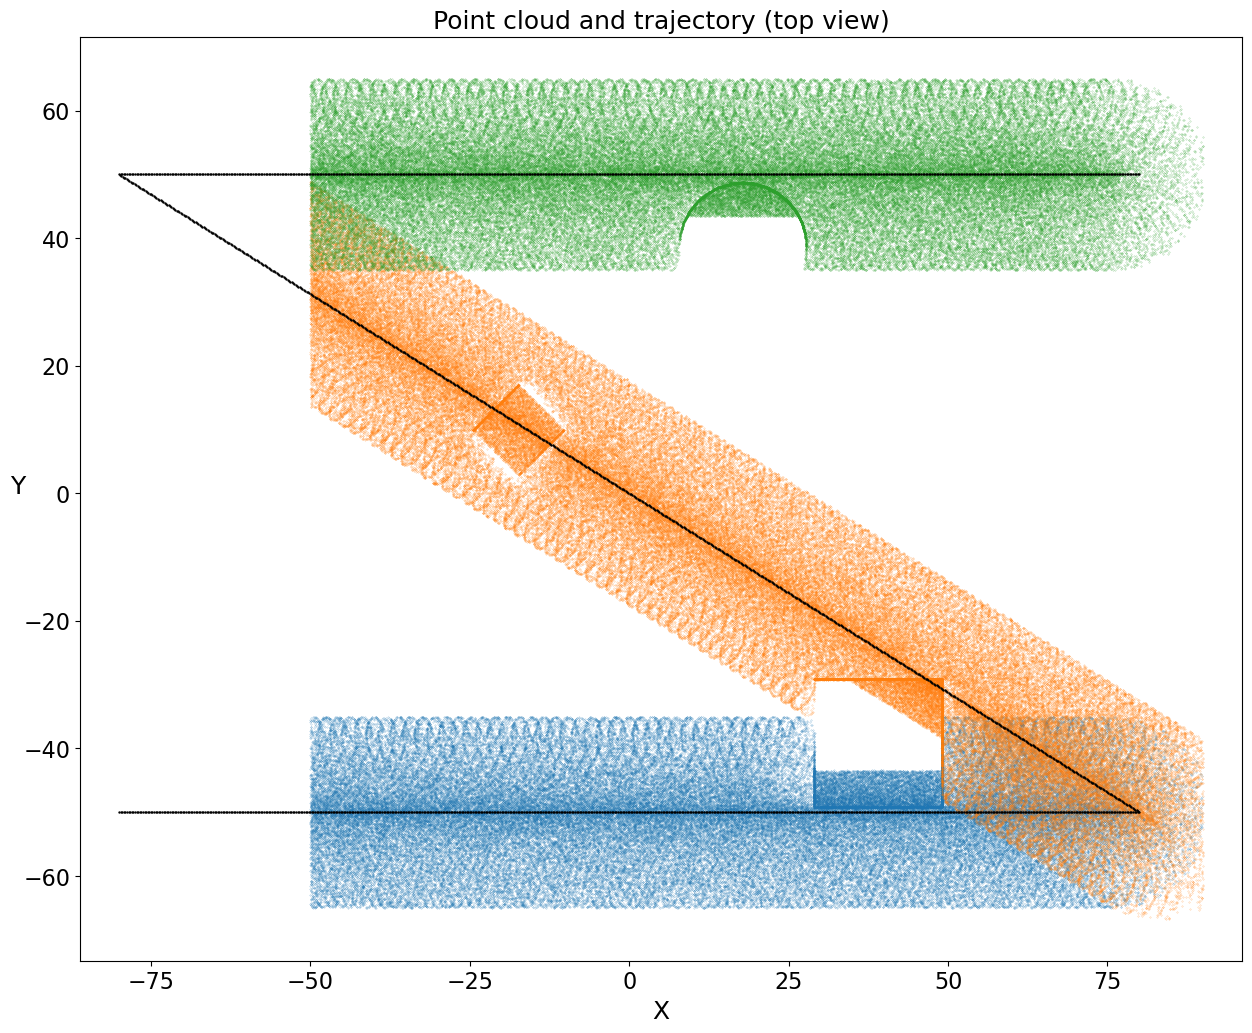

In [8]:
fig, ax = plt.subplots(figsize=(15, 12))

# view from above, colored by strip, including trajectory - show only every 20th measurement
ax.scatter(strip_1[::20, 0], strip_1[::20, 1], s=0.05, alpha=0.6) # select X and Y coordinates
ax.scatter(strip_2[::20, 0], strip_2[::20, 1], s=0.05, alpha=0.6)
ax.scatter(strip_3[::20, 0], strip_3[::20, 1], s=0.05, alpha=0.6)
ax.scatter(traj[:, 0], traj[:, 1], s=0.5, color="black")
ax.tick_params(labelsize=16)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18, rotation=0)

ax.set_title("Point cloud and trajectory (top view)", fontsize=18)

plt.axis('equal')
plt.show()

We can clearly recognize the unique [scan pattern of the Livox Mid series](https://user-images.githubusercontent.com/41050948/112597112-fd93b680-8e0c-11eb-986a-59e4ecea6a82.png) in the simulated point cloud.